In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load training and testing data
X_train = np.loadtxt('X_train.csv', delimiter=',', skiprows=1)
X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:,1]

# sigma
sig_sq = 2399.07091186

# prior mean and cov
l = 19
prior_mean = np.zeros((l,1))
prior_cov = 100.0*np.eye(l)



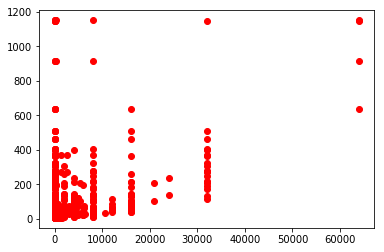

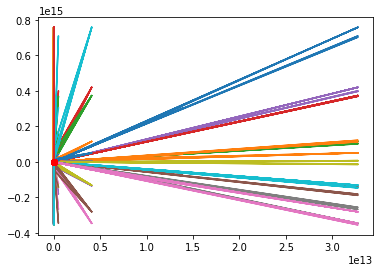

In [3]:
# create 3rd order X and Xtest matrices
X = np.hstack((np.ones((168,1)),X_train,X_train**2,X_train**3))
Xtest = np.hstack((np.ones((41,1)),X_test,X_test**2,X_test**3))

# plot x with y values
plt.figure()
plt.plot(X_train,y_train,'ro')

# compute prior distribution
sig_w = np.linalg.inv((1.0/sig_sq)*np.dot(X.T,X) + np.linalg.inv(prior_cov))
mu_w = (1.0/sig_sq)*np.dot(sig_w,np.dot(X.T,y_train))

# plot prior
w_samples = np.random.multivariate_normal(prior_mean.flatten(),prior_cov,10)
plt.figure()
for w_s in w_samples:
    plt.plot(Xtest,np.dot(Xtest,w_s))
plt.plot(X_train,y_train,'ro')


# posterior and compute predictions
predmu = np.dot(Xtest,mu_w) 
predvar = sig_sq + np.diag(np.dot(Xtest,np.dot(sig_w,Xtest.T)))



In [4]:
test_header = "Id,PRP"
n_points = predmu.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = predmu
np.savetxt('my_submission.csv', y_pred_pp, fmt='%d,%f', delimiter=",",
           header=test_header, comments="")